In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
cf.go_offline()
# %matplotlib notebook   
# use notebook instead of qt if you don't want interactive window in a separate window
# Dataimported from genesis and OECD statistics
#Interactive plots. The individual years can be zoomed in with the jupyter notebook interface.

In [34]:
def layout():
    fig.update_layout(dict(updatemenus=[
                            dict(
                                type = "buttons",
                                direction = "left",
                                buttons=list([
                                    dict(
                                        args=["visible", "legendonly"],
                                        label="Deselect All",
                                        method="restyle"
                                    ),
                                    dict(
                                        args=["visible", True],
                                        label="Select All",
                                        method="restyle"
                                    )
                                ]),
                                pad={"r": 10, "t": 10},
                                showactive=False,
                                x=1,
                                xanchor="right",
                                y=1.1,
                                yanchor="top"
                            ),
                        ]
                  ))

# Average life span in Germany graph 

In [35]:
%matplotlib qt
fig = plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
df=pd.read_csv('average-life.csv',delimiter=';')
df['time']=pd.to_datetime(df['time'],format='%Y')
df=df.rename(columns={"BEV033__Average_age_at_death__years":"Average age at death","2_variable_code.2":"Gender","time":"years"})
sns.lineplot(x="years",y="Average age at death",hue="Gender",data=df,style="Gender",
    markers=True, dashes=False)
plt.ylabel('Age')
plt.title('Average age at deatth')
plt.savefig('average-age.png')

#Average age at death for male and female in Germany from 1956 is given.

In [36]:
df=pd.read_csv('average-life.csv',delimiter=';')
df['time']=pd.to_datetime(df['time'],format='%Y')
df=df.rename(columns={"BEV033__Average_age_at_death__years":"Average age at death","2_variable_code.2":"Gender","time":"years"})
fig=px.line(df,x='years',y="Average age at death",labels={'years':'Year'},color="Gender",line_group="Gender",markers=True
       ,title='Average age at death in Germany', color_discrete_sequence=['royalblue', 'firebrick','gray'],symbol='Gender')
layout()
fig

In [37]:
fig=px.bar(df,x='years',y="Average age at death",title='Average life span in Germany',color="Gender",barmode='group')
layout()
fig

# Avoidable mortality graph:

In [60]:
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'] == 'Germany')& (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1
df1=df1.loc[df1['Measure'].isin(['Number of male deaths','Number of female deaths','Number of total deaths'])]

In [61]:
%matplotlib qt
figure = plt.figure(figsize=(10, 6))
sns.lineplot(x="Year",y="Value",hue="Measure",data=df1,style="Measure",
    markers=True, dashes=False,palette="cubehelix")
plt.xticks(df1['Year'])
plt.tight_layout()
plt.legend(title='Death by Group')
plt.ylabel('Total Number of Deaths')
plt.title('Avoidable Mortality(preventable+ treatable)')
plt.savefig('avoidable-mortality.png')
# 
#The graph shows both the preventable and avoidable mortality statistics of Germany from 2000 to 2019


In [39]:
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'] == 'Germany')& (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
px.line(df1,x='Year',y="Value",labels={'Value':'Number of deaths'},color="Measure",line_group="Measure",markers=True
       ,title='Avoidable Mortality in Germany',symbol='Measure',symbol_sequence= ['circle-open', 'circle', 'circle-open-dot', 'square','diamond','x'])


# Preventable vs Treatable Mortality graph

In [16]:
%matplotlib qt
df=pd.read_csv('Mortality.csv')
df1=df.loc[(df['Country'] == 'Germany')&(df['Variable'].isin(['Treatable mortality','Preventable mortality']))&(df['Measure']=='Number of male deaths')]
df2=df.loc[(df['Country'] == 'Germany')&(df['Variable'].isin(['Treatable mortality','Preventable mortality']))&(df['Measure']=='Number of female deaths')]
fig, axes = plt.subplots(2, 1,figsize=(10, 8))
ax0=sns.barplot(x="Year",y="Value",hue="Variable",data=df1,ci=None,palette="Spectral",ax=axes[0])
ax1=sns.barplot(x="Year",y="Value",hue="Variable",data=df2,palette="Spectral",ci=None,ax=axes[1])
ax0.set_title('Avoidable mortality Male')
ax1.set_title('Avoidable mortality Female')
ax0.set(xlabel=None)
ax0.set(ylabel='Total Number of Deaths')
ax0.get_legend().set_title("Avoidable mortality")
ax1.get_legend().remove()
ax1.set(ylabel='Total Number of Deaths')
plt.tight_layout()
plt.savefig('mortality.png')

#A bar graph to show the preventable and treatable mortality separately for the two groups

# Countrywise Avoidable mortality graph

In [35]:
%matplotlib qt
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'].isin(['Germany','Spain','United Kingdom','Italy','Denmark','Ireland'])) & (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
plt.figure()
df1['Year']=pd.to_datetime(df1['Year'],format='%Y')
sns.lineplot(x="Year",y="Value",hue="Country",data=df1,style="Country",
    markers=True, dashes=False,palette="flare")
plt.ylabel('Number of Deaths per 100000 ')
plt.title('Avoidable Mortality')
plt.savefig('Countrymortality.png')

In [32]:
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'].isin(['Germany','Spain','Denmark','United Kingdom','Italy','Ireland'])) & (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
df1['key']=df1.groupby(['Year','Country']).cumcount()
df1 = pd.pivot_table(df1,index='Year',columns=['key', 'Country'],values='Value')
df1 = df1.stack(level=[0,1],dropna=False).reset_index()
df1
df1=df1.rename(columns={0:"Number of deaths per 100000"})
fig = px.bar(df1, x="Country", y="Number of deaths per 100000", color="Country",
  animation_frame="Year",animation_group='Country',range_y=[0,500])
fig.update_layout(transition = {'duration': 2000})



In [8]:
%matplotlib qt
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[df1['Variable']=='Avoidable mortality (preventable+treatable)']
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
fig=px.line(df1,x='Year',y="Value",labels={'Value':'Number of deaths per 10000'},color="Country",line_group="Country",markers=True
       ,title='Avoidable Mortality',symbol='Country')
layout()
fig


In [38]:
dataframe=pd.read_csv('Mortality.csv')
Deaths=dataframe[dataframe['Measure']=="Deaths per 100 000 population (standardised rates)"]['Value']
Year=dataframe[dataframe['Measure']=="Deaths per 100 000 population (standardised rates)"]['Year']
Country=dataframe[dataframe['Measure']=="Deaths per 100 000 population (standardised rates)"]['Country']
fig = go.Figure(data=go.Heatmap(
                   z=Deaths,
                   x=Year,
                   y=Country,
                   hoverongaps = True, colorscale='Viridis'))
fig


In [54]:
dataframe1=pd.read_csv('Mortality.csv')
dataframe1=df1.loc[dataframe1['Variable']=='Avoidable mortality (preventable+treatable)']
dataframe1=dataframe1.loc[dataframe1['Measure']=="Deaths per 100 000 population (standardised rates)"]
fig=px.line_3d(dataframe1,x='Year',y='Country',z='Measure',color='Country',template="plotly_dark")
layout()
fig.show()

In [81]:
%matplotlib qt
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'].isin(['Germany','Australia','Brazil','Japan'])) & (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
df1['Year']=pd.to_datetime(df1['Year'],format='%Y')
df1=pd.pivot_table(df1,index='Year',columns='Country',values='Value')
df1.plot.area(stacked=False,color=sns.color_palette("cividis_r"))
plt.ylabel('Number of Deaths per 100000 ')
plt.title('Avoidable Mortality')
plt.savefig('areachart.png')
plt.legend(loc="upper right")

In [82]:
%matplotlib qt
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Country'].isin(['Germany','Canada','Ireland','Poland'])) & (df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
sns.lmplot(x="Year",y="Value",hue="Country",data=df1,fit_reg=False,markers=["o","x","+","^"])
plt.ylabel('Number of Deaths per 100000 ')
plt.title('Avoidable Mortality')
plt.savefig('scatterplot.png')

<IPython.core.display.Javascript object>


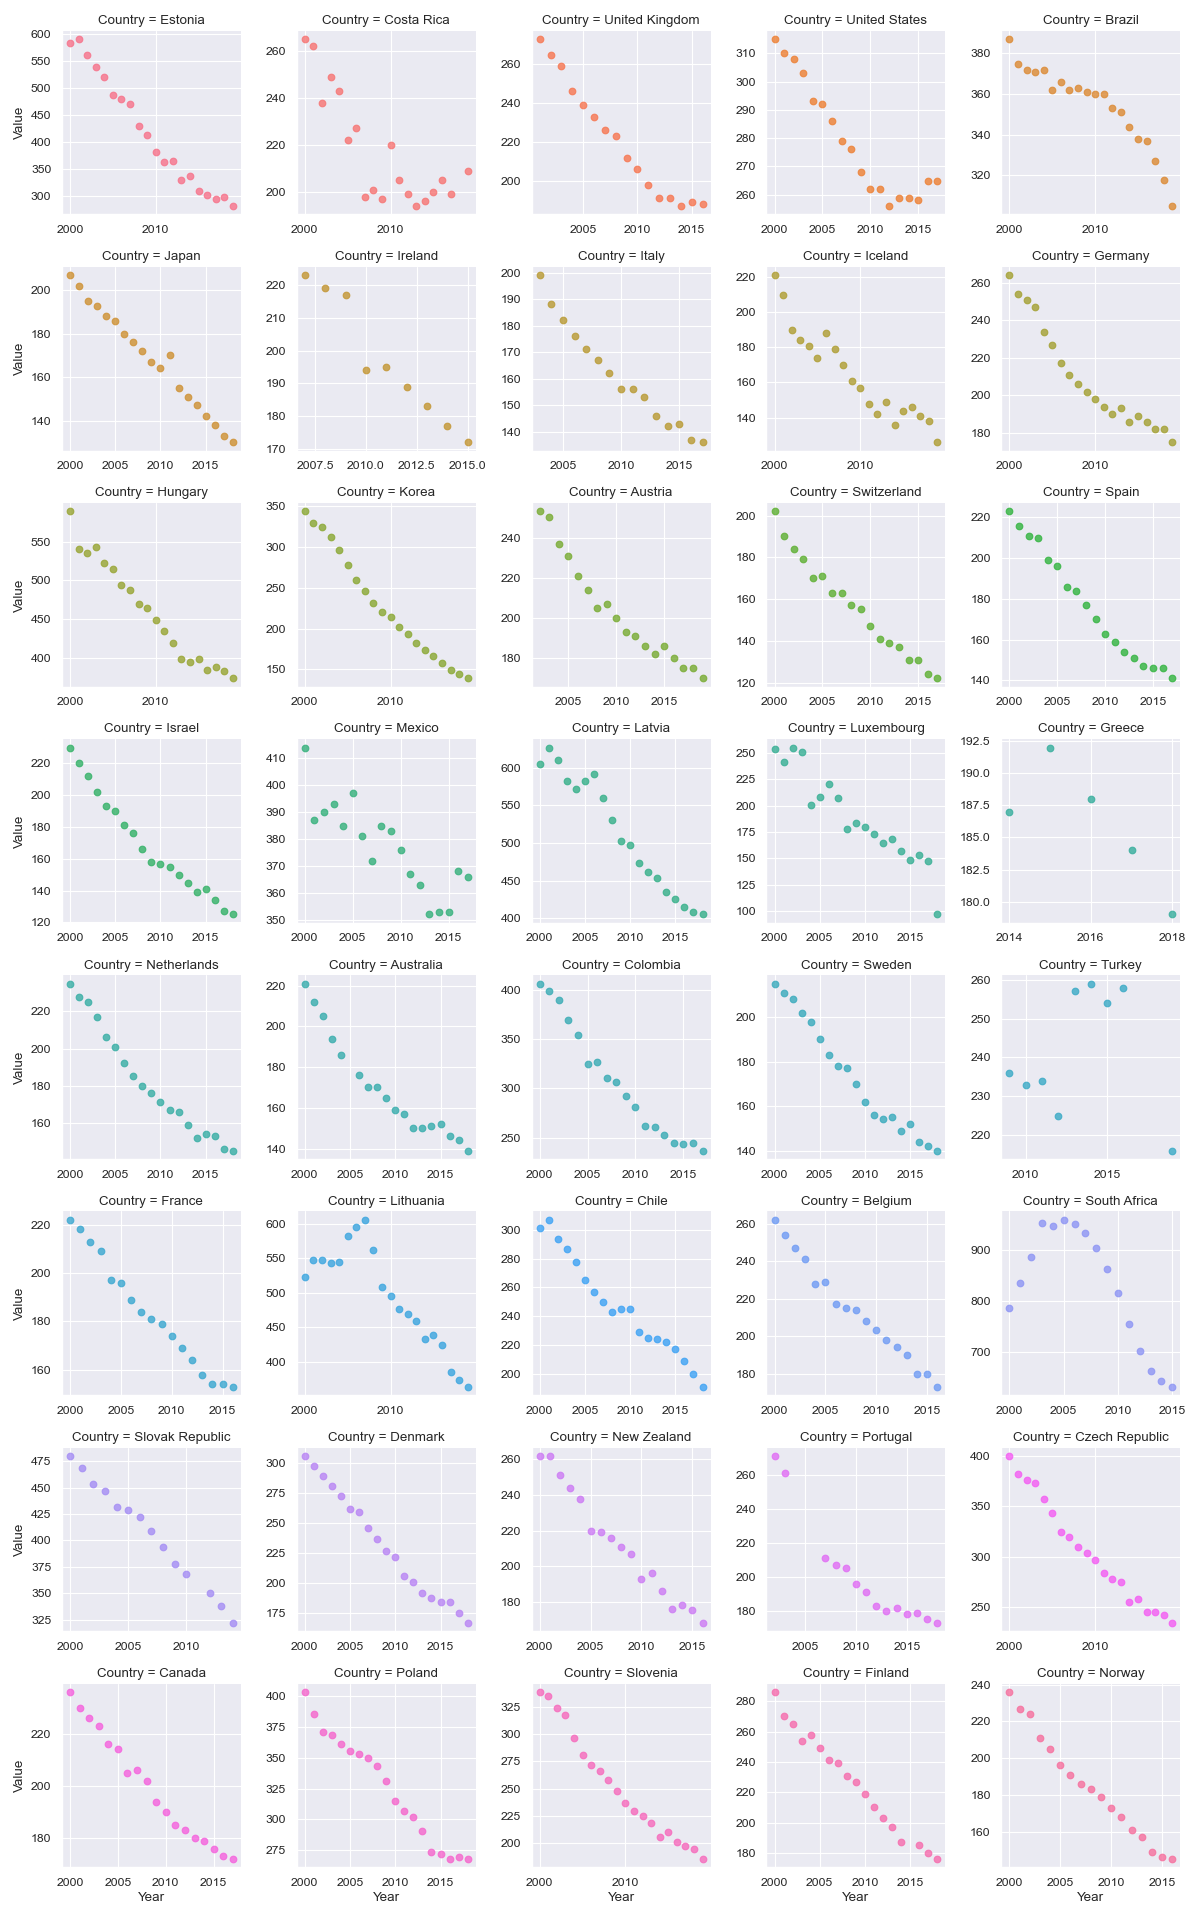

In [14]:
plt.switch_backend('nbAgg')
df1=pd.read_csv('Mortality.csv')
df1=df1.loc[(df1['Variable']=='Avoidable mortality (preventable+treatable)')]
df1=df1.loc[df1['Measure']=="Deaths per 100 000 population (standardised rates)"]
sns.lmplot(x='Year',y="Value",hue="Country",col="Country",data=df1,fit_reg=False,col_wrap=5,height=3,facet_kws=dict(sharex=False,sharey=False))
plt.savefig('scattergrid.png')